# Introduction

Muflih Hafidz Danurhadi RMT 020

[link deploy](https://huggingface.co/spaces/lucretion/H8_ML4)

saya ingin melihat faktor apa yang mempengaruhi churn berdasarkan:
 * Fitur / Data apa saja yang berpengaruh pada hasil churn?
 * Model seperti apa yang digunakan?
 * bagaimana perkembangan ANN?
 * Apakah hasil goodfit?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
#feature enginering
%pip install feature-engine
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
#ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, concatenate, BatchNormalization, Dropout
from sklearn.metrics import precision_score,accuracy_score, classification_report,confusion_matrix
from tensorflow.keras import Model
# model saving and inference
import pickle
import json

Note: you may need to restart the kernel to use updated packages.


# Data Loading

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df_copy = df.copy()

contoh data keseluruhan

In [4]:
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [5]:
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [6]:
'''list_all_cols = list(df.columns)
list_max_col = list(df.max())
list_min_col = list(df.min())'''

'list_all_cols = list(df.columns)\nlist_max_col = list(df.max())\nlist_min_col = list(df.min())'

# Explanatory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [8]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


mencari niliar max dari pay dan rata rata dari bill_amt dan pay_amt untuk memudahkan analisis, tidak dipakai di ML

In [9]:
df.columns

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

## Function

In [10]:
def print_dup(df=df):
  print('{} of data is duplicated rows'.format(str(round(df.duplicated().sum() / df.shape[0] * 100,2))+'%'))

In [11]:
def print_null(df=df):
  print('{} of data is NuLL'.format(str(round(df.isna().sum().sum() / df.shape[0] * 100,2))+'%'))

In [12]:
def uniques(feature, col_name='unique',df=df):
    unique_values = df[feature].unique()
    unique_df = pd.DataFrame({col_name: unique_values})
    return unique_df

In [13]:
def scatter_plots(df, colname_pairs, scatter_plot_size=5, size=8, alpha=.6):
    plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
    for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
        ax = plt.subplot(1, len(colname_pairs), plot_i)
        ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
        plt.xlabel(x_colname)
        plt.ylabel(y_colname)
        ax.spines[['top', 'right']].set_visible(False)
    plt.tight_layout()
    plt.show()


In [14]:
def histogram(df, colname, num_bins=20, figsize=(10, 5)):
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.axvline(df[colname].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[colname].median(), color='green', linestyle='dashed', linewidth=2)
  plt.axvline(df[colname].mode()[0], color='blue', linestyle='dashed', linewidth=2)
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  plt.show()

In [15]:
def value_plot(df, y, sort_ascending=False, figsize=(10, 5)):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  plt.show()

In [16]:
def heatmap(df, x_colname, y_colname, figsize=(7, 7)):
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  plt.title(f'Korelasi antara {x_colname} dan {y_colname}')
  plt.show()

In [17]:
def categorical_histogram(df, colname, figsize=(5, 5), mpl_palette_name='Dark2'):
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.show()

In [18]:
def outlier(variable,graph = False ,data=df):
    skew  = (data[variable].skew()).round(2)
    print('\nSkewness Value : ', skew)
    if graph:
      # Define figure size
      plt.figure(figsize=(5, 5))
      sns.boxplot(y=data[variable])
      plt.title(f'Boxplot {variable}')

      plt.show()

    return skew

In [19]:
def normal_bound(variable,printout=False,data=df):
    upper_boundary = round((data[variable].mean() + 3 * data[variable].std()),2)
    lower_boundary = round((data[variable].mean() - 3 * data[variable].std()),2)
    if printout:
      print('Total: {}'.format(len(data[variable])))
      print(f'right end outliers (> {upper_boundary}): {len(data[data[variable]  > upper_boundary])}')
      print(f'left end outliers  (< {lower_boundary}): {len(data[data[variable]  < lower_boundary])}')
      print('')
      print('% right end outliers: {:.2f}%'.format(round(len(data[data[variable] > upper_boundary]) / len(data[variable]) * 100, 2)))
      print('% left end outliers : {:.2f}%'.format(round(len(data[data[variable] < lower_boundary]) / len(data[variable]) * 100, 2)))
    total_outlier = (len(data[data[variable]  > upper_boundary]))+(len(data[data[variable]  < lower_boundary]))
    return upper_boundary, lower_boundary, total_outlier

In [20]:
def skewed_bound(variable,printout=False, distance=1.5,data=df):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    lower_boundary = round((data[variable].quantile(0.25) - (IQR * distance)),2)
    upper_boundary = round((data[variable].quantile(0.75) + (IQR * distance)).round(2),2)
    if printout:
      print('Total: {}'.format(len(data[variable])))
      print(f'right end outliers (> {upper_boundary}): {len(data[data[variable]  > upper_boundary])}')
      print(f'left end outliers  (< {lower_boundary}): {len(data[data[variable]  < lower_boundary])}')
      print('')
      print('% right end outliers: {:.2f}%'.format(round(len(data[data[variable] > upper_boundary]) / len(data[variable]) * 100, 2)))
      print('% left end outliers : {:.2f}%'.format(round(len(data[data[variable] < lower_boundary]) / len(data[variable]) * 100, 2)))
    total_outlier = (len(data[data[variable]  > upper_boundary]))+(len(data[data[variable]  < lower_boundary]))
    return upper_boundary, lower_boundary, total_outlier

## Chart and analysis

In [21]:
print_dup()
print_null()

0.05% of data is duplicated rows
44.89% of data is NuLL


In [22]:
df = df.drop_duplicates()

In [23]:
df_null=pd.DataFrame(df.isnull().sum(),columns=['Number Of Null'])
df_null['Percentage']=df_null['Number Of Null']/df.shape[0]*100
df_null

,Number Of Null,Percentage
user_id,0,0.000000
age,0,0.000000
gender,59,0.159494
region_category,5428,14.673443
membership_category,0,0.000000
joining_date,0,0.000000
joined_through_referral,5438,14.700476
preferred_offer_types,288,0.778547
medium_of_operation,5393,14.578828
internet_option,0,0.000000


In [24]:
null_columns = ['region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']
null_rows = df[df[null_columns].isnull().any(axis=1)]
null_rows

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.83,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0


karena random MCAR, Maka diganti oleh modus

In [25]:
df_num_columns = df.select_dtypes(include=np.number).columns.tolist()
df_cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', df_num_columns)
print('Cat Columns : ', df_cat_columns)

Num Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
Cat Columns :  ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [26]:
for i in range(len(df_cat_columns)):
  print(uniques(df_cat_columns[i],col_name=f'{df_cat_columns[i]} unique'))

         user_id unique
0      9f420209e7d129f3
1      ac6e97806267549e
2      a6aa19b1580eed4e
3      aeee343277211c2f
4      82448b5c8ce6390c
...                 ...
36987  924e9c06f0c73817
36988  90e22286ac0acf04
36989  9329a6297407334a
36990  a4403ddda8fcf9f3
36991  93b5d0330d24fa15

[36992 rows x 1 columns]
  gender unique
0             F
1             M
2           NaN
  region_category unique
0                    NaN
1                   City
2                Village
3                   Town
  membership_category unique
0              No Membership
1           Basic Membership
2          Silver Membership
3         Premium Membership
4            Gold Membership
5        Platinum Membership
     joining_date unique
0             2017-04-05
1             2017-03-31
2             2017-02-11
3             2015-12-23
4             2015-03-20
...                  ...
1091          2016-11-30
1092          2015-01-08
1093          2015-04-08
1094          2015-08-06
1095          2015-

karna user_id, joining_date, last_visit_time terlalu banyak, maka tidak dipakai

In [27]:
cat_col_filtered = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']

---age---


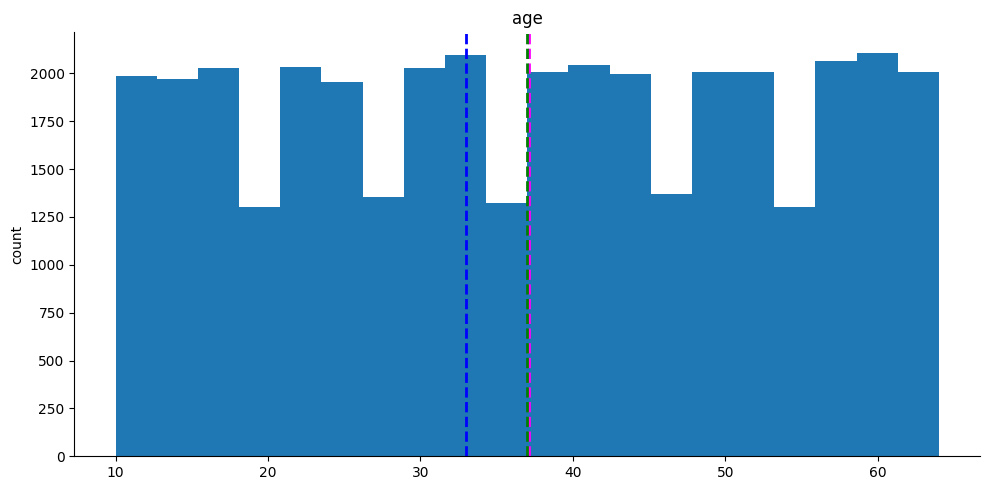

Mean age: 37.12
Median age: 37.0
mode age: 33
max age: 64
min age: 10
std age: 15.87
---days_since_last_login---


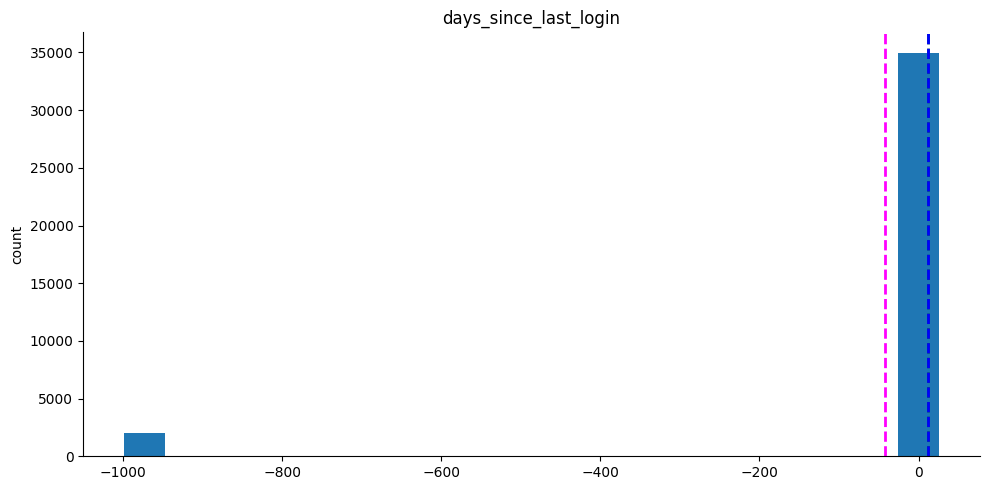

Mean days_since_last_login: -41.92
Median days_since_last_login: 12.0
mode days_since_last_login: 12
max days_since_last_login: 26
min days_since_last_login: -999
std days_since_last_login: 228.82
---avg_time_spent---


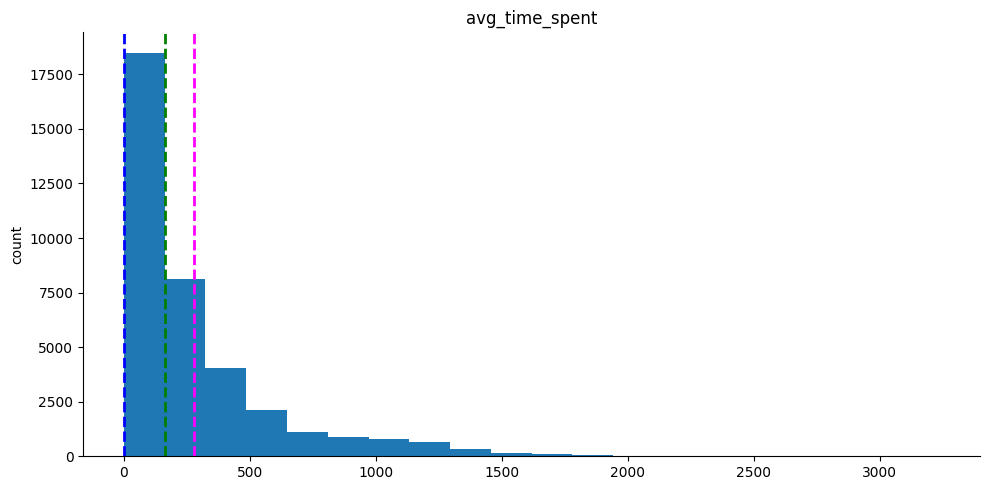

Mean avg_time_spent: 279.15
Median avg_time_spent: 161.765
mode avg_time_spent: 0.0
max avg_time_spent: 3235.5785210942604
min avg_time_spent: 0.0
std avg_time_spent: 329.95
---avg_transaction_value---


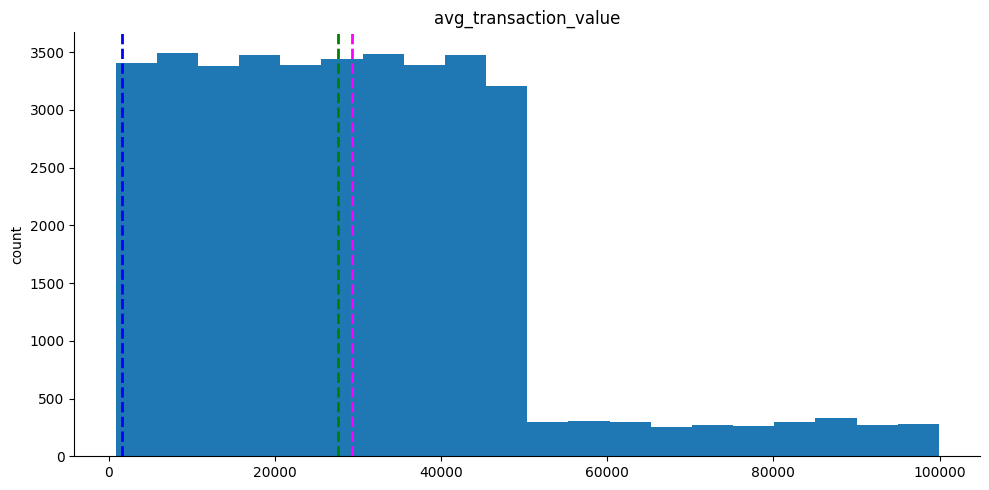

Mean avg_transaction_value: 29271.19
Median avg_transaction_value: 27554.485
mode avg_transaction_value: 1603.36
max avg_transaction_value: 99914.05
min avg_transaction_value: 800.46
std avg_transaction_value: 19444.81
---avg_frequency_login_days---


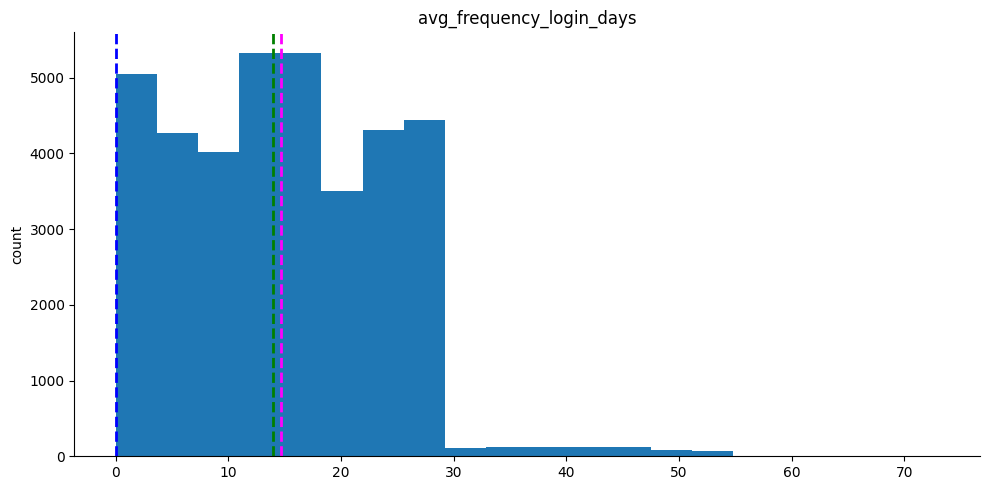

Mean avg_frequency_login_days: 14.66
Median avg_frequency_login_days: 14.0
mode avg_frequency_login_days: 0.0
max avg_frequency_login_days: 73.06199459430009
min avg_frequency_login_days: 0.0
std avg_frequency_login_days: 9.48
---points_in_wallet---


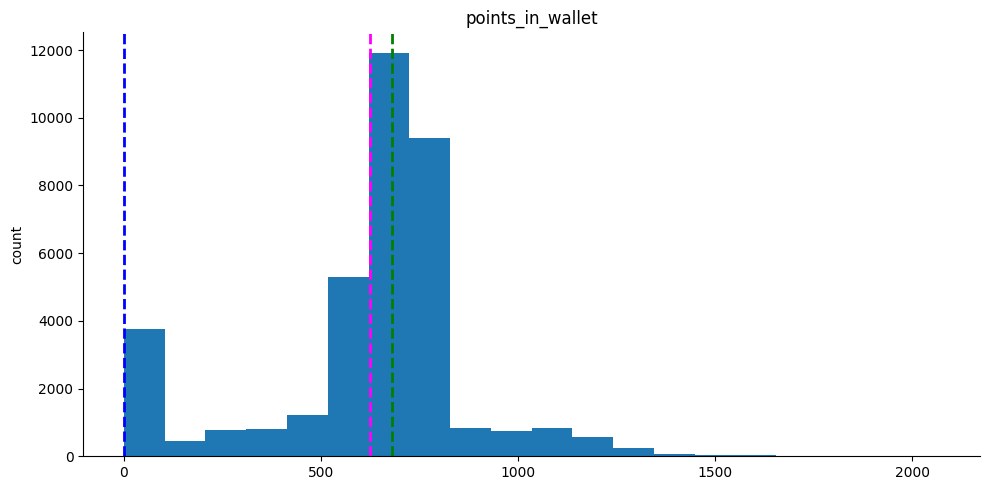

Mean points_in_wallet: 623.56
Median points_in_wallet: 680.37
mode points_in_wallet: 0.0
max points_in_wallet: 2069.069760814851
min points_in_wallet: 0.0
std points_in_wallet: 270.26
---churn_risk_score---


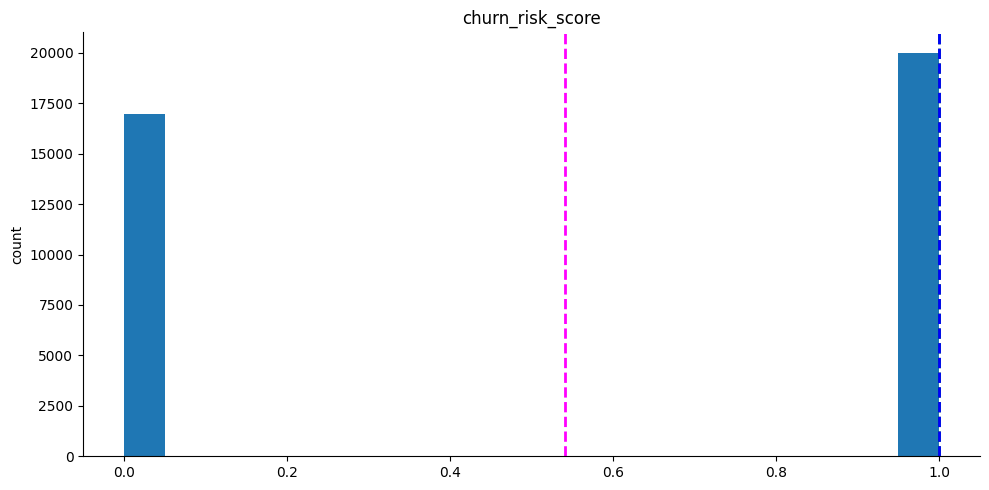

Mean churn_risk_score: 0.54
Median churn_risk_score: 1.0
mode churn_risk_score: 1
max churn_risk_score: 1
min churn_risk_score: 0
std churn_risk_score: 0.5


In [28]:
for i in range(len( df_num_columns)):
  print(f'---{ df_num_columns[i]}---')
  chart = histogram(df,  df_num_columns[i], **{})
  print(f'Mean { df_num_columns[i]}:',df[ df_num_columns[i]].mean().round(2))
  print(f'Median { df_num_columns[i]}:',df[ df_num_columns[i]].median())
  print(f'mode { df_num_columns[i]}:',df[ df_num_columns[i]].mode()[0])
  print(f'max { df_num_columns[i]}:',df[ df_num_columns[i]].max())
  print(f'min { df_num_columns[i]}:',df[ df_num_columns[i]].min())
  print(f'std { df_num_columns[i]}:',df[ df_num_columns[i]].std().round(2))

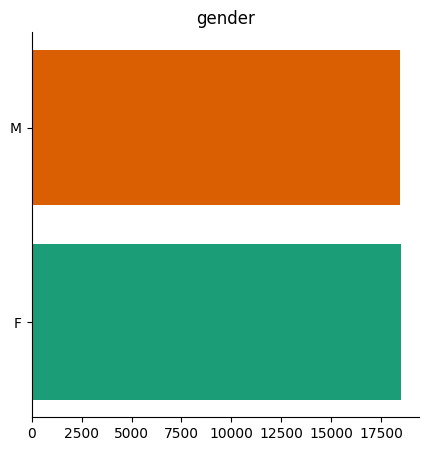

gender Values Percentage
gender
F    49.98
M    49.86
Name: count, dtype: float64


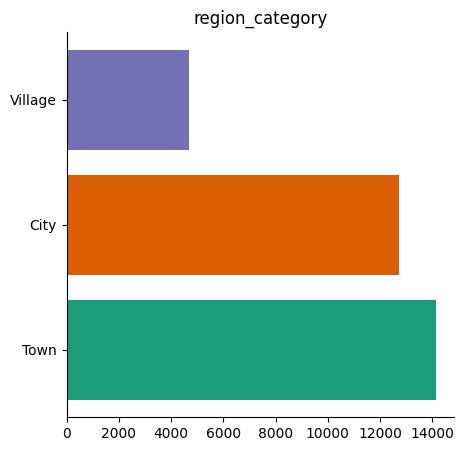

region_category Values Percentage
region_category
Town       38.19
City       34.43
Village    12.70
Name: count, dtype: float64


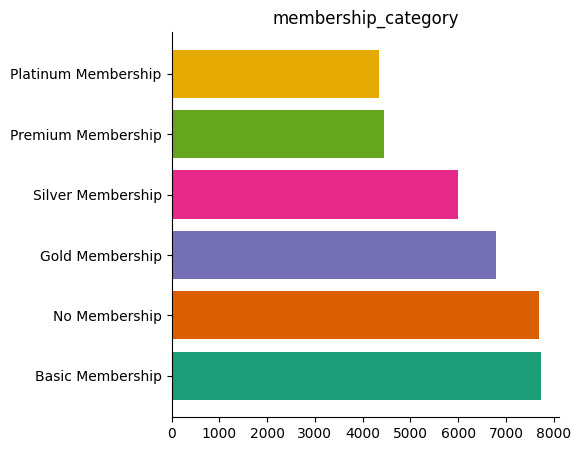

membership_category Values Percentage
membership_category
Basic Membership       20.88
No Membership          20.79
Gold Membership        18.37
Silver Membership      16.19
Premium Membership     12.04
Platinum Membership    11.73
Name: count, dtype: float64


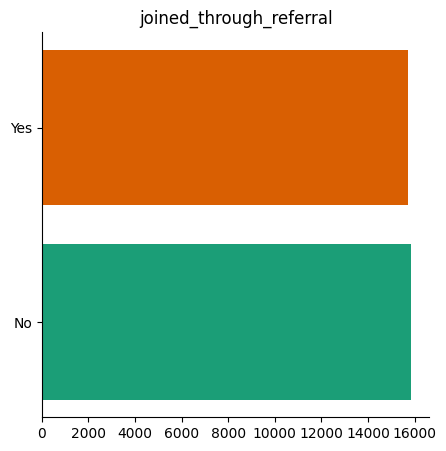

joined_through_referral Values Percentage
joined_through_referral
No     42.82
Yes    42.48
Name: count, dtype: float64


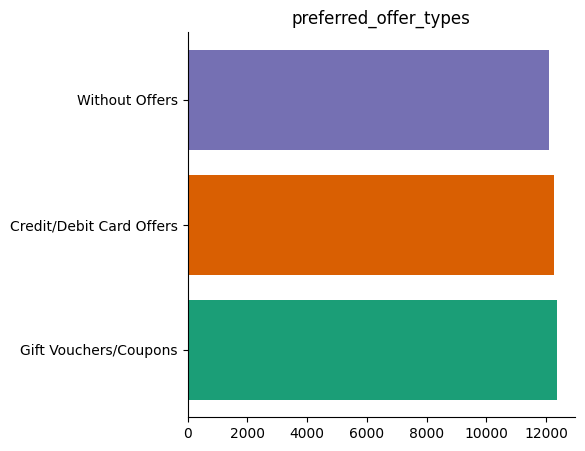

preferred_offer_types Values Percentage
preferred_offer_types
Gift Vouchers/Coupons       33.38
Credit/Debit Card Offers    33.18
Without Offers              32.66
Name: count, dtype: float64


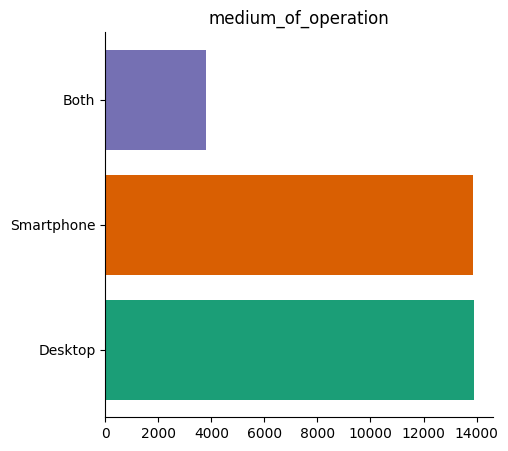

medium_of_operation Values Percentage
medium_of_operation
Desktop       37.61
Smartphone    37.51
Both          10.30
Name: count, dtype: float64


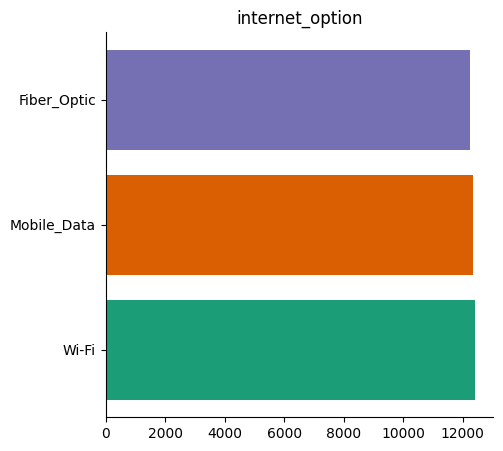

internet_option Values Percentage
internet_option
Wi-Fi          33.56
Mobile_Data    33.37
Fiber_Optic    33.08
Name: count, dtype: float64


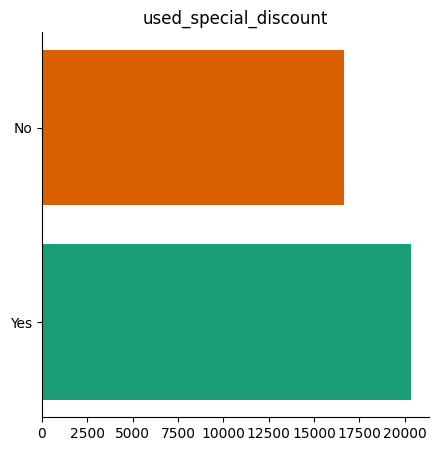

used_special_discount Values Percentage
used_special_discount
Yes    54.99
No     45.01
Name: count, dtype: float64


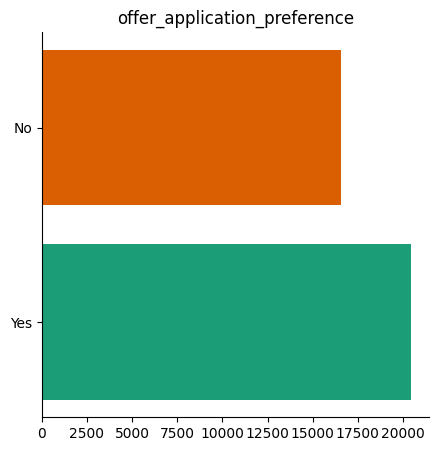

offer_application_preference Values Percentage
offer_application_preference
Yes    55.26
No     44.74
Name: count, dtype: float64


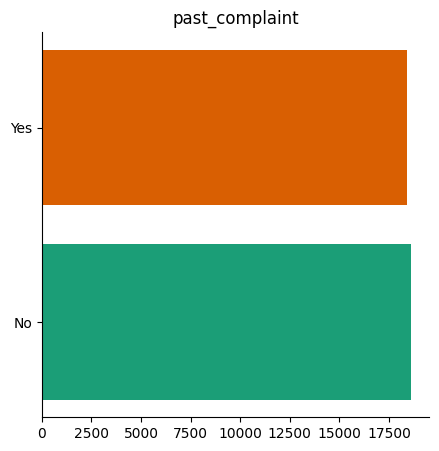

past_complaint Values Percentage
past_complaint
No     50.29
Yes    49.71
Name: count, dtype: float64


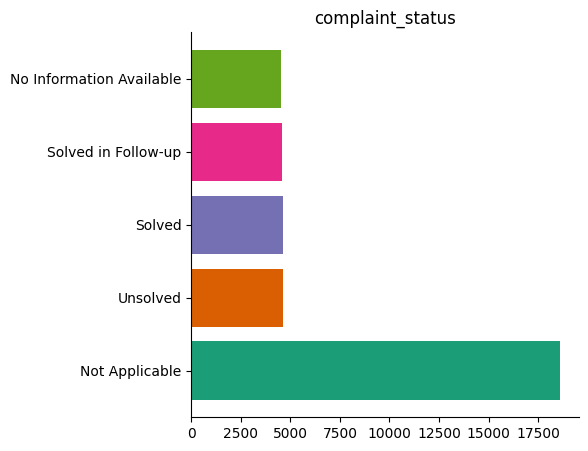

complaint_status Values Percentage
complaint_status
Not Applicable              50.29
Unsolved                    12.55
Solved                      12.49
Solved in Follow-up         12.37
No Information Available    12.30
Name: count, dtype: float64


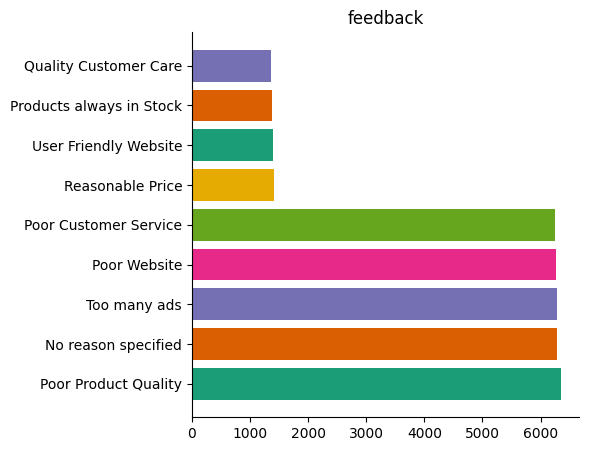

feedback Values Percentage
feedback
Poor Product Quality        17.17
No reason specified         17.00
Too many ads                16.97
Poor Website                16.95
Poor Customer Service       16.90
Reasonable Price             3.83
User Friendly Website        3.76
Products always in Stock     3.74
Quality Customer Care        3.68
Name: count, dtype: float64


In [29]:
for i in range (len(cat_col_filtered)):
  categorical_histogram(df, *[cat_col_filtered[i]], **{})
  print(f'{cat_col_filtered[i]} Values Percentage')
  jumlah = df[cat_col_filtered[i]].value_counts()
  total = len(df)
  percentages = round((jumlah / total) * 100,2)
  print(percentages)

In [30]:
for i in range ((len(cat_col_filtered))):
  heatmap(df, *['churn_risk_score', cat_col_filtered[i]], **{})
  highest_death = df.groupby(cat_col_filtered[i])['churn_risk_score'].sum().idxmax()
  lowest_death = df.groupby(cat_col_filtered[i])['churn_risk_score'].sum().idxmin()
  highest_survived = df[df['churn_risk_score'] == 0].groupby(cat_col_filtered[i])['churn_risk_score'].count().idxmax()
  lowest_survived = df[df['churn_risk_score'] == 0].groupby(cat_col_filtered[i])['churn_risk_score'].count().idxmin()

  count_death_highest = df.groupby(cat_col_filtered[i])['churn_risk_score'].sum().max()
  count_death_lowest = df.groupby(cat_col_filtered[i])['churn_risk_score'].sum().min()
  count_survived_highest = df[df['churn_risk_score'] == 0].groupby(cat_col_filtered[i])['churn_risk_score'].count().max()
  count_survived_lowest = df[df['churn_risk_score'] == 0].groupby(cat_col_filtered[i])['churn_risk_score'].count().min()

  print(f"kelompok {cat_col_filtered[i]} {highest_death} memiliki churn (1) tertinggi sejumlah {count_death_highest}")
  print(f"kelompok {cat_col_filtered[i]} {highest_survived} memiliki not churn (0) tertinggi sejumlah {count_survived_highest}")
  print(f"kelompok {cat_col_filtered[i]} {lowest_death} memiliki churn terendah (1) sejumlah {count_death_lowest}")
  print(f"kelompok {cat_col_filtered[i]} {lowest_survived} memiliki not churn terendah (0) sejumlah {count_survived_lowest}")

  print('\n')


In [ ]:
normal_list = []
skewed_list = []
normal_values = []
skewed_values = []

---age---

Skewness Value :  -0.01


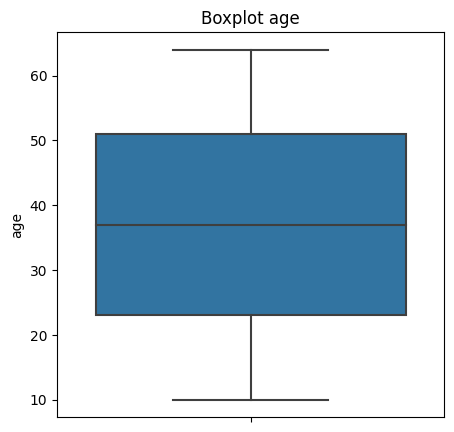

-0.01
Normal
Total: 37010
right end outliers (> 84.72): 0
left end outliers  (< -10.48): 0

% right end outliers: 0.00%
% left end outliers : 0.00%

---days_since_last_login---

Skewness Value :  -3.94


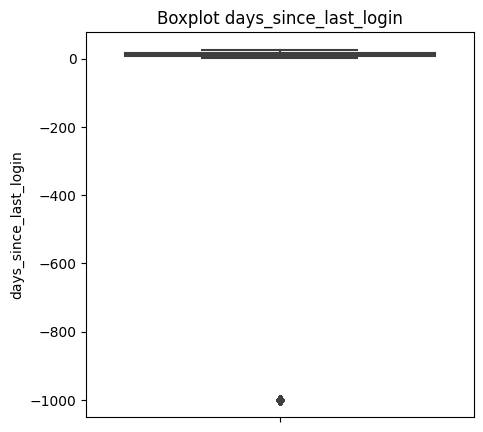

-3.94
Skewed
Total: 37010
right end outliers (> 28.0): 0
left end outliers  (< -4.0): 2001

% right end outliers: 0.00%
% left end outliers : 5.41%

---avg_time_spent---

Skewness Value :  2.28


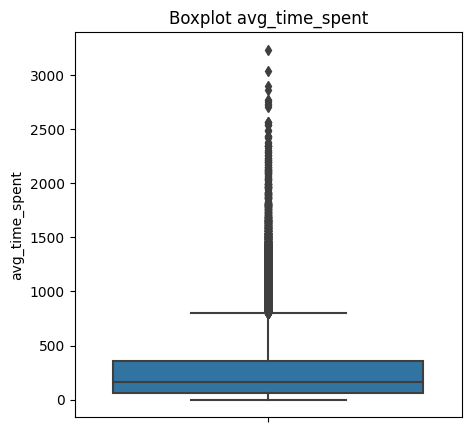

2.28
Skewed
Total: 37010
right end outliers (> 801.13): 3112
left end outliers  (< -384.48): 0

% right end outliers: 8.41%
% left end outliers : 0.00%

---avg_transaction_value---

Skewness Value :  1.01


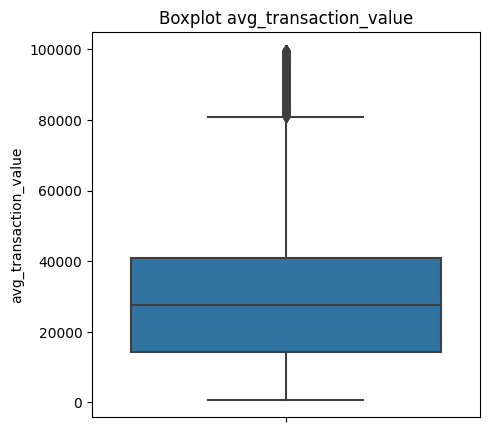

1.01
Skewed
Total: 37010
right end outliers (> 80879.93): 1131
left end outliers  (< -25843.42): 0

% right end outliers: 3.06%
% left end outliers : 0.00%

---avg_frequency_login_days---

Skewness Value :  0.39


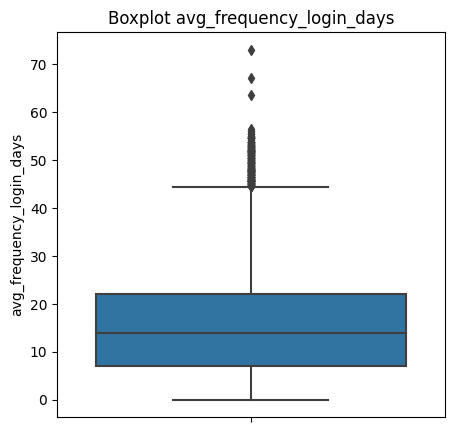

0.39
Normal
Total: 37010
right end outliers (> 43.1): 312
left end outliers  (< -13.78): 0

% right end outliers: 0.84%
% left end outliers : 0.00%

---points_in_wallet---

Skewness Value :  -0.77


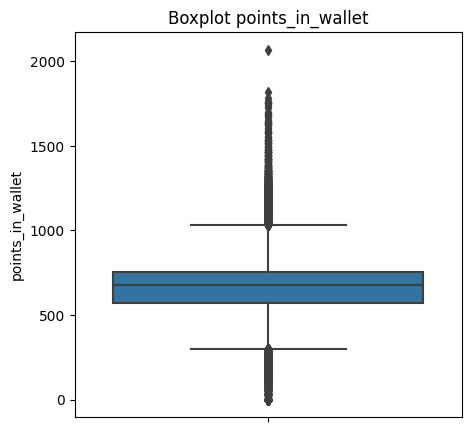

-0.77
Skewed
Total: 37010
right end outliers (> 1031.14): 1825
left end outliers  (< 300.07): 4867

% right end outliers: 4.93%
% left end outliers : 13.15%

---churn_risk_score---

Skewness Value :  -0.16


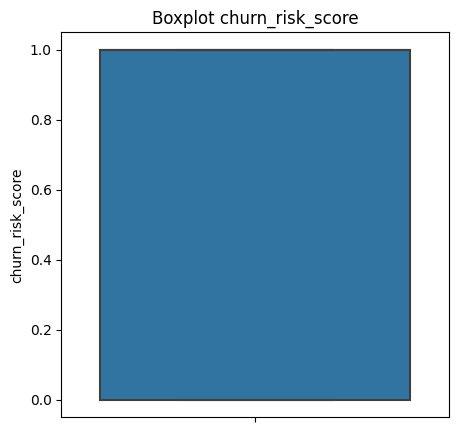

-0.16
Normal
Total: 37010
right end outliers (> 2.04): 0
left end outliers  (< -0.95): 0

% right end outliers: 0.00%
% left end outliers : 0.00%



In [ ]:
for i in range (len(df_num_columns)):
  print(f'---{df_num_columns[i]}---')
  skew = outlier(df_num_columns[i],graph = True)
  print(skew)
  if  -0.5<= skew <=0.5:
    print('Normal')
    normal = normal_bound(df_num_columns[i],True)
    normal_list.append(df_num_columns[i])
    normal_values.append(normal[2])
  else:
    print('Skewed')
    skewed = skewed_bound(df_num_columns[i],True)
    skewed_list.append(df_num_columns[i])
    skewed_values.append(skewed[2])

  print('')

In [ ]:
print(normal_list)
print(skewed_list)

['age', 'avg_frequency_login_days', 'churn_risk_score']
['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet']


In [ ]:
print(normal_values)
print(skewed_values)

[0, 312, 0]
[2001, 3112, 1131, 6692]


karena paling banyak adalah data yang skewed makan pengolahan data menggunakan winsorizer

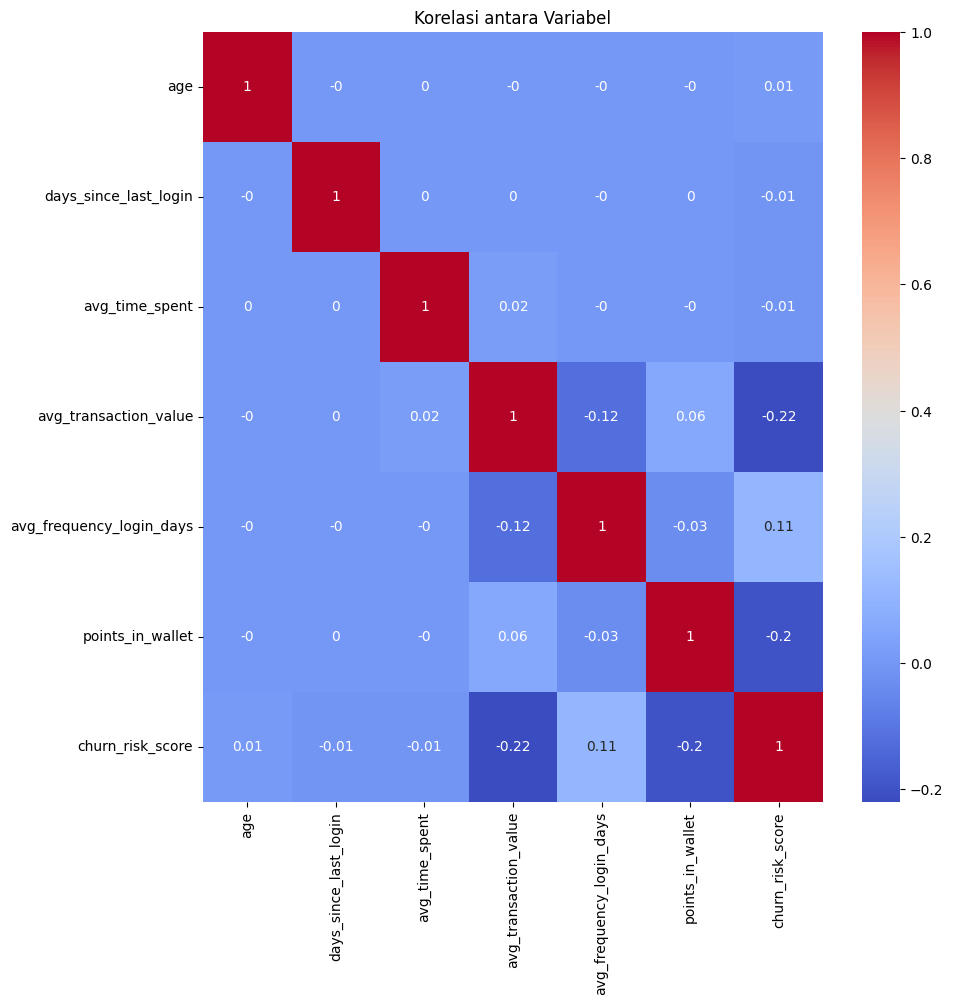

In [ ]:
correlation_matrix = df[df_num_columns].corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel')
plt.show()

In [ ]:
feature_cols = []

In [ ]:
target = 'churn_risk_score'

In [ ]:
for i in range(len( df_num_columns)):
  print(f'---{ df_num_columns[i]}---')
  group_positive = df[df['churn_risk_score'] == 1][df_num_columns[i]]
  group_negative = df[df['churn_risk_score'] == 0][df_num_columns[i]]
  statistic, p_value = f_oneway(group_positive, group_negative)

  print(f"ANOVA Results {df_num_columns[i]}:")
  print("F-statistic:", round(statistic,3))
  print("p-value:", round(p_value,3))

  if p_value < 0.05 and df_num_columns[i] != target :
      print(f"Ada hubungan yang signifikan antara {df_num_columns[i]} dan churn_risk_score")
      feature_cols.append(df_num_columns[i])
  else:
      print(f"Tidak ada hubungan yang signifikan antara {df_num_columns[i]} dan churn_risk_score")

  print('\n')


---age---
ANOVA Results age:
F-statistic: 1.388
p-value: 0.239
Tidak ada hubungan yang signifikan antara age dan churn_risk_score


---days_since_last_login---
ANOVA Results days_since_last_login:
F-statistic: 1.435
p-value: 0.231
Tidak ada hubungan yang signifikan antara days_since_last_login dan churn_risk_score


---avg_time_spent---
ANOVA Results avg_time_spent:
F-statistic: 6.49
p-value: 0.011
Ada hubungan yang signifikan antara avg_time_spent dan churn_risk_score


---avg_transaction_value---
ANOVA Results avg_transaction_value:
F-statistic: 1845.841
p-value: 0.0
Ada hubungan yang signifikan antara avg_transaction_value dan churn_risk_score


---avg_frequency_login_days---
ANOVA Results avg_frequency_login_days:
F-statistic: 482.948
p-value: 0.0
Ada hubungan yang signifikan antara avg_frequency_login_days dan churn_risk_score


---points_in_wallet---
ANOVA Results points_in_wallet:
F-statistic: 1543.923
p-value: 0.0
Ada hubungan yang signifikan antara points_in_wallet dan churn_r

c:\Users\user\anaconda3\envs\tensorCUDA\lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
for i in range(len(df_cat_columns)):
  print(f'---{ df_cat_columns[i]}---')
  cross_tab = pd.crosstab(df[df_cat_columns[i]], df['churn_risk_score'])
  chi2, p_value, dof, expected = chi2_contingency(cross_tab)
  print(f"Hasil Uji Chi-Square {df_cat_columns[i]}:")
  print("Chi-Square:", round(chi2,3))
  print("Nilai p-value:", round(p_value,3))

  if p_value < 0.05 and df_cat_columns[i] != target:
      print(f"Ada hubungan yang signifikan antara {df_cat_columns[i]} dan churn_risk_score")
      feature_cols.append(df_cat_columns[i])
  else:
      print(f"Tidak ada hubungan yang signifikan antara {df_cat_columns[i]} dan churn_risk_score")

  print('\n')

---user_id---
Hasil Uji Chi-Square user_id:
Chi-Square: 36992.0
Nilai p-value: 0.498
Tidak ada hubungan yang signifikan antara user_id dan churn_risk_score


---gender---
Hasil Uji Chi-Square gender:
Chi-Square: 0.855
Nilai p-value: 0.355
Tidak ada hubungan yang signifikan antara gender dan churn_risk_score


---region_category---
Hasil Uji Chi-Square region_category:
Chi-Square: 17.643
Nilai p-value: 0.0
Ada hubungan yang signifikan antara region_category dan churn_risk_score


---membership_category---
Hasil Uji Chi-Square membership_category:
Chi-Square: 22851.552
Nilai p-value: 0.0
Ada hubungan yang signifikan antara membership_category dan churn_risk_score


---joining_date---
Hasil Uji Chi-Square joining_date:
Chi-Square: 1052.993
Nilai p-value: 0.815
Tidak ada hubungan yang signifikan antara joining_date dan churn_risk_score


---joined_through_referral---
Hasil Uji Chi-Square joined_through_referral:
Chi-Square: 40.854
Nilai p-value: 0.0
Ada hubungan yang signifikan antara join

melihat fitur yang digunakan

In [ ]:
feature_cols

['avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'used_special_discount',
 'offer_application_preference',
 'feedback']

# Feature Engineering

## Splitting between Train-Set, Val-Set, and Test-Set

In [ ]:
# Splitting between `X` and `y`

X = df[feature_cols]
y = df['churn_risk_score']

In [ ]:
X.head(10)

,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,used_special_discount,offer_application_preference,feedback
0,1184.490000,38604.69,10.0,627.48000,NaN,No Membership,Yes,Without Offers,NaN,Yes,Yes,Poor Website
1,338.150000,7665.66,17.0,575.97000,NaN,Basic Membership,Yes,Without Offers,Desktop,Yes,No,Poor Customer Service
2,235.140000,37671.69,5.0,767.93000,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,Yes,No,Too many ads
3,56.670000,15678.14,11.0,590.22000,Village,No Membership,No,Credit/Debit Card Offers,Desktop,No,Yes,Too many ads
4,153.990000,8422.68,0.0,722.04000,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,Yes,No,Poor Product Quality
5,1397.318999,29664.01,28.0,782.49000,Town,Premium Membership,No,Credit/Debit Card Offers,NaN,No,Yes,Poor Product Quality
6,416.300000,13160.39,24.0,712.94000,NaN,Gold Membership,Yes,Gift Vouchers/Coupons,Smartphone,Yes,No,No reason specified
7,34.070000,9151.14,29.0,655.43000,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Yes,No,No reason specified
8,650.120000,81628.48,11.0,0.00000,Town,Platinum Membership,Yes,Without Offers,NaN,Yes,Yes,Products always in Stock
9,106.230000,28232.59,16.0,984.93392,Town,Basic Membership,Yes,Credit/Debit Card Offers,Desktop,No,Yes,Too many ads


In [ ]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10, random_state=20)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26633, 12)
Val Size :  (2960, 12)
Test Size :  (7399, 12)


In [ ]:
# Check Missing Values on X_train

X_train.isnull().sum()

avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
region_category                 3880
membership_category                0
joined_through_referral         3942
preferred_offer_types            212
medium_of_operation             3863
used_special_discount              0
offer_application_preference       0
feedback                           0
dtype: int64

In [ ]:
# Check Missing Values on X_val

X_val.isnull().sum()

avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
region_category                 445
membership_category               0
joined_through_referral         419
preferred_offer_types            27
medium_of_operation             408
used_special_discount             0
offer_application_preference      0
feedback                          0
dtype: int64

In [ ]:
# Check Missing Values on X_test

X_test.isnull().sum()

avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
region_category                 1103
membership_category                0
joined_through_referral         1077
preferred_offer_types             49
medium_of_operation             1122
used_special_discount              0
offer_application_preference       0
feedback                           0
dtype: int64

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'used_special_discount', 'offer_application_preference', 'feedback']


In [ ]:
X[cat_columns]

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,used_special_discount,offer_application_preference,feedback
0,NaN,No Membership,Yes,Without Offers,NaN,Yes,Yes,Poor Website
1,NaN,Basic Membership,Yes,Without Offers,Desktop,Yes,No,Poor Customer Service
2,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,Yes,No,Too many ads
3,Village,No Membership,No,Credit/Debit Card Offers,Desktop,No,Yes,Too many ads
4,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,Yes,No,Poor Product Quality
...,...,...,...,...,...,...,...,...
37005,Town,Gold Membership,NaN,Credit/Debit Card Offers,NaN,Yes,Yes,User Friendly Website
37006,City,Gold Membership,Yes,Without Offers,Desktop,No,Yes,Reasonable Price
37007,NaN,Gold Membership,Yes,Without Offers,NaN,Yes,Yes,Poor Customer Service
37008,City,Gold Membership,Yes,Without Offers,Desktop,No,Yes,Poor Website


## Feature Finalization

yg preprocessing coba coba aja

In [ ]:
preprocessing = ColumnTransformer(transformers=[
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5), num_columns),
    ('scaler', MinMaxScaler(), num_columns),
    ('imputer', SimpleImputer(strategy='most_frequent'), cat_columns),
    ('encoder', OrdinalEncoder(), cat_columns)
])

In [ ]:
# Fit and Transform

X_train_fit = preprocessing.fit_transform(X_train)
X_val_fit = preprocessing.transform(X_val)
X_test_fit = preprocessing.transform(X_test)

In [ ]:
num_pipeline = make_pipeline(Winsorizer(capping_method='iqr', tail='both', fold=1.5),
                             MinMaxScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OrdinalEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [ ]:
preprocessing

ColumnTransformer(transformers=[('winsorizer',
                                 Winsorizer(capping_method='iqr', fold=1.5,
                                            tail='both'),
                                 ['avg_time_spent', 'avg_transaction_value',
                                  'avg_frequency_login_days',
                                  'points_in_wallet']),
                                ('scaler', MinMaxScaler(),
                                 ['avg_time_spent', 'avg_transaction_value',
                                  'avg_frequency_login_days',
                                  'points_in_wallet']),
                                ('imputer',
                                 SimpleImputer(strategy='most_frequ...
                                  'joined_through_referral',
                                  'preferred_offer_types',
                                  'medium_of_operation',
                                  'used_special_discount',
                                  'offer_application_preference', 'feedback']),
                                ('encoder', OrdinalEncoder(),
                                 ['region_category', 'membership_category',
                                  'joined_through_referral',
                                  'preferred_offer_types',
                                  'medium_of_operation',
                                  'used_special_discount',
                                  'offer_application_preference',
                                  'feedback'])])

In [ ]:
final_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['avg_time_spent', 'avg_transaction_value',
                                  'avg_frequency_login_days',
                                  'points_in_wallet']),
                                ('pipe_cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['region_category', 'membership_category',
                                  'joined_through_referral',
                                  'preferred_offer_types',
                                  'medium_of_operation',
                                  'used_special_discount',
                                  'offer_application_preference',
                                  'feedback'])])

In [ ]:
X_train_fit = final_pipeline.fit_transform(X_train)
X_val_fit = final_pipeline.transform(X_val)
X_test_fit = final_pipeline.transform(X_test)

In [ ]:
X_train_fit.shape

(26633, 12)

In [ ]:
X_train_fit[0]

array([0.13404303, 0.50319671, 0.        , 0.12948811, 0.        ,
       5.        , 1.        , 0.        , 2.        , 1.        ,
       0.        , 2.        ])

In [ ]:
train_tf = tf.data.Dataset.from_tensor_slices((X_train_fit,y_train)).batch(32).shuffle(len(X_train_fit)).prefetch(tf.data.AUTOTUNE)#jgn pake repeat
test_tf = tf.data.Dataset.from_tensor_slices((X_test_fit,y_test)).batch(16)
val_tf = tf.data.Dataset.from_tensor_slices((X_val_fit,y_val)).batch(16)

# Sequential API

## Model Definition

In [ ]:
seed = 20
tf.keras.backend.clear_session()

In [ ]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(24,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(12,))) # Hidden Layer 1
model_sequential.add(Dense(24,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 937 (3.66 KB)
Trainable params: 937 (3.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Model ANN Sequential API dengan 2 hidden layers dan 1 output layer.

* Input Layer:

  Jumlah neuron: 12 (sesuai dengan jumlah fitur pada input data).

  Activation function: Tidak didefinisikan karena untuk input data

* Hidden Layer 1:

  Jumlah neuron: 24.

  Activation function: ReLU (Rectified Linear Unit). ReLU merupakan fungsi aktivasi non-linear yang menggantikan semua nilai negatif dengan nol dan melewatkan nilai positif tanpa perubahan.

* Hidden Layer 2:

  Jumlah neuron: 24.

  Activation function: ReLU.

* Output Layer:

  Jumlah neuron: 1 (karena output untuk klasifikasi biner).
  
  Activation function: Sigmoid. Fungsi sigmoid digunakan pada output layer untuk menghasilkan probabilitas prediksi dalam rentang [0, 1], yang dapat digunakan untuk mengklasifikasikan data ke dalam 2 kelas.

* Optimizer:

  Optimizer 'adam' untuk mengoptimasi fungsi loss binary crossentropy untuk tugas klasifikasi biner. Metrik evaluasi yang digunakan adalah akurasi yang mengukur seberapa akurat model dalam melakukan prediksi benar terhadap total data yang ada.

## Model Training

In [ ]:
# Train the Model

history_seq = model_sequential.fit(train_tf,
                                   epochs=25,
                                   validation_data=(val_tf))

Epoch 1/25
833/833 [==============================] - 2s 1ms/step - loss: 0.6497 - accuracy: 0.6983 - val_loss: 0.5405 - val_accuracy: 0.7287
Epoch 2/25
833/833 [==============================] - 1s 912us/step - loss: 0.5226 - accuracy: 0.7330 - val_loss: 0.5128 - val_accuracy: 0.7385
Epoch 3/25
833/833 [==============================] - 1s 925us/step - loss: 0.4942 - accuracy: 0.7523 - val_loss: 0.4948 - val_accuracy: 0.7625
Epoch 4/25
833/833 [==============================] - 1s 914us/step - loss: 0.4699 - accuracy: 0.7723 - val_loss: 0.4595 - val_accuracy: 0.7807
Epoch 5/25
833/833 [==============================] - 1s 935us/step - loss: 0.4414 - accuracy: 0.7927 - val_loss: 0.4250 - val_accuracy: 0.8057
Epoch 6/25
833/833 [==============================] - 1s 939us/step - loss: 0.4003 - accuracy: 0.8275 - val_loss: 0.3783 - val_accuracy: 0.8446
Epoch 7/25
833/833 [==============================] - 1s 933us/step - loss: 0.3541 - accuracy: 0.8486 - val_loss: 0.3356 - val_accuracy: 0

##  Model Evaluation

In [ ]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.649737,0.698269,0.540454,0.728716
1,0.522616,0.733000,0.512754,0.738514
2,0.494155,0.752262,0.494795,0.762500
3,0.469949,0.772275,0.459506,0.780743
4,0.441412,0.792738,0.425016,0.805743
5,0.400302,0.827545,0.378303,0.844595
6,0.354051,0.848646,0.335593,0.852365
7,0.325881,0.853941,0.317036,0.857432
8,0.311104,0.860849,0.312284,0.851689
9,0.301826,0.860061,0.296165,0.867230


<Axes: >

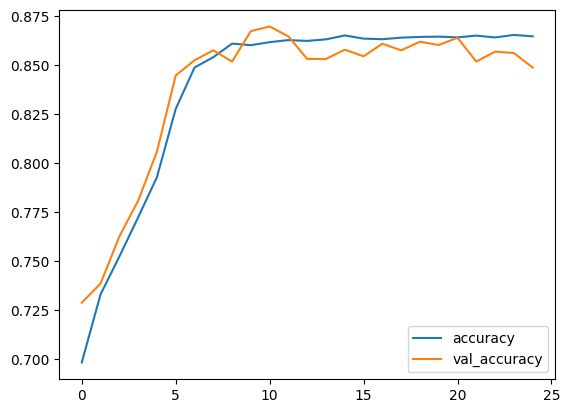

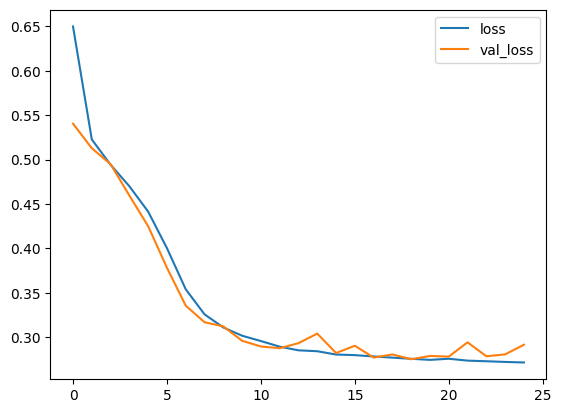

In [ ]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(X_test_fit)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

232/232 [==============================] - 0s 583us/step
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3362
           1       0.82      0.93      0.87      4037

    accuracy                           0.85      7399
   macro avg       0.86      0.84      0.85      7399
weighted avg       0.86      0.85      0.85      7399



In [ ]:
train_score = model_sequential.evaluate(train_tf)
print("Train Score - Loss: {:.4f}, Accuracy: {:.4f}".format(train_score[0], train_score[1]))

val_score = model_sequential.evaluate(val_tf)
print("val Score - Loss: {:.4f}, Accuracy: {:.4f}".format(val_score[0], val_score[1]))

test_score = model_sequential.evaluate(test_tf)
print("Test Score - Loss: {:.4f}, Accuracy: {:.4f}".format(test_score[0], test_score[1]))


  1/833 [..............................] - ETA: 30s - loss: 0.2695 - accuracy: 0.8750

833/833 [==============================] - 1s 677us/step - loss: 0.2820 - accuracy: 0.8595
Train Score - Loss: 0.2820, Accuracy: 0.8595
185/185 [==============================] - 0s 656us/step - loss: 0.2917 - accuracy: 0.8486
val Score - Loss: 0.2917, Accuracy: 0.8486
463/463 [==============================] - 0s 699us/step - loss: 0.2858 - accuracy: 0.8525
Test Score - Loss: 0.2858, Accuracy: 0.8525


## Model Improvement

menambahkan batch normalization dan dropout

In [ ]:
seed = 20
tf.keras.backend.clear_session()

In [ ]:
# Create Sequential API

model_seq_up = Sequential()
model_seq_up.add(Dense(24,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(12,))) # Hidden Layer 1
model_seq_up.add(BatchNormalization())
model_seq_up.add(Dropout(0.2))
model_seq_up.add(Dense(24,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_seq_up.add(BatchNormalization())
model_seq_up.add(Dropout(0.2))
model_seq_up.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_seq_up.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_seq_up.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 batch_normalization (Batch  (None, 24)                96        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 


 dense_1 (Dense)             (None, 24)                600       
                                                                 
 batch_normalization_1 (Bat  (None, 24)                96        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1129 (4.41 KB)
Trainable params: 1033 (4.04 KB)
Non-trainable params: 96 (384.00 Byte)
_________________________________________________________________


In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_seq_up, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Model ANN Sequential API yang telah di improve dengan 2 hidden layers dan 1 output layer.

* Input Layer:

  Jumlah neuron: 12 (sesuai dengan jumlah fitur pada input data).

  Activation function: Tidak didefinisikan karena untuk input data

* Hidden Layer 1:

  Jumlah neuron: 24.

  Activation function: ReLU (Rectified Linear Unit). ReLU merupakan fungsi aktivasi non-linear yang menggantikan semua nilai negatif dengan nol dan melewatkan nilai positif tanpa perubahan.

  BatchNormalization: Dilakukan setelah aktivasi dan digunakan untuk mengnormalisasi input dari setiap batch pada setiap layer sehingga meningkatkan stabilitas dan kecepatan konvergensi pelatihan model

  Dropout Layer:
  Dropout merupakan teknik regularization yang secara acak mengaktifkan atau menonaktifkan neuron pada layer sebelumnya selama pelatihan untuk mengurangi overfitting pada model. Dropout rate sebesar 0.2

* Hidden Layer 2:

  Jumlah neuron: 24.

  Activation function: ReLU. lalu batch normalization dan dropout

* Output Layer:

  Jumlah neuron: 1 (karena output untuk klasifikasi biner).
  
  Activation function: Sigmoid. Fungsi sigmoid digunakan pada output layer untuk menghasilkan probabilitas prediksi dalam rentang [0, 1], yang dapat digunakan untuk mengklasifikasikan data ke dalam 2 kelas.

* Optimizer:

  Optimizer 'adam' untuk mengoptimasi fungsi loss binary crossentropy untuk tugas klasifikasi biner. Metrik evaluasi yang digunakan adalah akurasi yang mengukur seberapa akurat model dalam melakukan prediksi benar terhadap total data yang ada.



In [ ]:
# Train the Model

history_seq_up = model_seq_up.fit(train_tf,
                                   epochs=25,
                                   validation_data=(val_tf))

Epoch 1/25


833/833 [==============================] - 2s 1ms/step - loss: 0.6060 - accuracy: 0.6972 - val_loss: 0.5247 - val_accuracy: 0.7622
Epoch 2/25
833/833 [==============================] - 1s 1ms/step - loss: 0.5426 - accuracy: 0.7421 - val_loss: 0.5033 - val_accuracy: 0.7784
Epoch 3/25
833/833 [==============================] - 1s 1ms/step - loss: 0.5232 - accuracy: 0.7531 - val_loss: 0.4830 - val_accuracy: 0.7875
Epoch 4/25
833/833 [==============================] - 1s 1ms/step - loss: 0.5032 - accuracy: 0.7625 - val_loss: 0.4504 - val_accuracy: 0.7956
Epoch 5/25
833/833 [==============================] - 1s 1ms/step - loss: 0.4711 - accuracy: 0.7849 - val_loss: 0.3893 - val_accuracy: 0.8287
Epoch 6/25
833/833 [==============================] - 1s 1ms/step - loss: 0.4256 - accuracy: 0.8089 - val_loss: 0.3293 - val_accuracy: 0.8564
Epoch 7/25
833/833 [==============================] - 1s 1ms/step - loss: 0.3881 - accuracy: 0.8314 - val_loss: 0.3001 - val_accuracy: 0.8679
Epoch 8/25
833/83

In [ ]:
# Create DataFrame

history_seq_up_df = pd.DataFrame(history_seq_up.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.649737,0.698269,0.540454,0.728716
1,0.522616,0.733000,0.512754,0.738514
2,0.494155,0.752262,0.494795,0.762500
3,0.469949,0.772275,0.459506,0.780743
4,0.441412,0.792738,0.425016,0.805743
5,0.400302,0.827545,0.378303,0.844595
6,0.354051,0.848646,0.335593,0.852365
7,0.325881,0.853941,0.317036,0.857432
8,0.311104,0.860849,0.312284,0.851689
9,0.301826,0.860061,0.296165,0.867230


<Axes: >

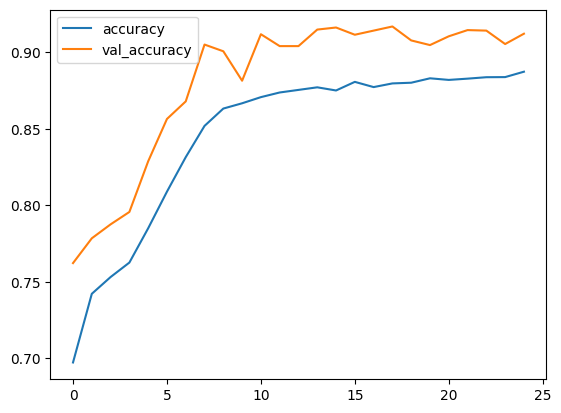

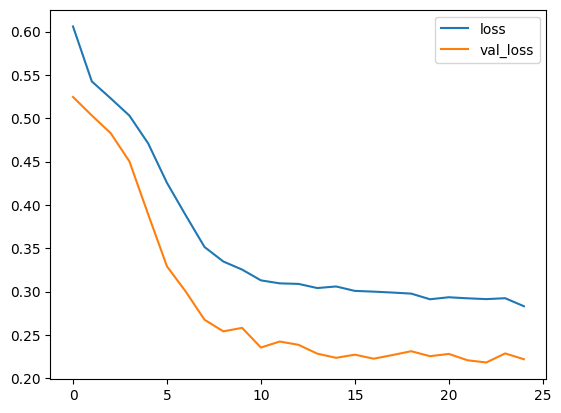

In [ ]:
# Plot Training Results

history_seq_up_df[['accuracy', 'val_accuracy']].plot()
history_seq_up_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation of test-set
y_pred_seq = model_seq_up.predict(X_test_fit)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

232/232 [==============================] - 0s 613us/step
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3362
           1       0.95      0.91      0.93      4037

    accuracy                           0.92      7399
   macro avg       0.92      0.92      0.92      7399
weighted avg       0.92      0.92      0.92      7399



In [ ]:
train_score = model_seq_up.evaluate(train_tf)
print("Train Score - Loss: {:.4f}, Accuracy: {:.4f}".format(train_score[0], train_score[1]))

val_score = model_seq_up.evaluate(val_tf)
print("val Score - Loss: {:.4f}, Accuracy: {:.4f}".format(val_score[0], val_score[1]))

test_score = model_seq_up.evaluate(test_tf)
print("Test Score - Loss: {:.4f}, Accuracy: {:.4f}".format(test_score[0], test_score[1]))


833/833 [==============================] - 1s 739us/step - loss: 0.2188 - accuracy: 0.9194
Train Score - Loss: 0.2188, Accuracy: 0.9194
185/185 [==============================] - 0s 723us/step - loss: 0.2220 - accuracy: 0.9122
val Score - Loss: 0.2220, Accuracy: 0.9122
463/463 [==============================] - 0s 725us/step - loss: 0.2152 - accuracy: 0.9235
Test Score - Loss: 0.2152, Accuracy: 0.9235


# Functional API

## Model Definition

menambahkan concat untuk input dan hasil hidden layer 2

In [ ]:
# Clear Session
tf.keras.backend.clear_session()
seed = 20

In [ ]:
# Create Functional Model

input_layer = Input(shape=(12))

hidden_layer_1 = Dense(24, activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)

hidden_layer_2 = Dense(24, activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid',
                     kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 12)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 24)                   312       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 24)                   600       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 36)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Model ANN Functional API dengan 2 hidden layers dan 1 output layer.

* Input Layer:

  Jumlah neuron: 12 (sesuai dengan jumlah fitur pada input data).

  Activation function: Tidak didefinisikan karena untuk input data

* Hidden Layer 1:

  Jumlah neuron: 24.

  Activation function: ReLU (Rectified Linear Unit). ReLU merupakan fungsi aktivasi non-linear yang menggantikan semua nilai negatif dengan nol dan melewatkan nilai positif tanpa perubahan.

* Hidden Layer 2:

  Jumlah neuron: 24.

  Activation function: ReLU.

* Concatenate Layer:

  Menggabungkan output dari input layer dan hidden_layer_2 yang berfungsi sebagai fitur yang ditambahkan ke input_layer.

* Output Layer:

  Jumlah neuron: 1 (karena output untuk klasifikasi biner).
  
  Activation function: Sigmoid. Fungsi sigmoid digunakan pada output layer untuk menghasilkan probabilitas prediksi dalam rentang [0, 1], yang dapat digunakan untuk mengklasifikasikan data ke dalam 2 kelas.

* Optimizer:

  Optimizer 'adam' untuk mengoptimasi fungsi loss binary crossentropy untuk tugas klasifikasi biner. Metrik evaluasi yang digunakan adalah akurasi yang mengukur seberapa akurat model dalam melakukan prediksi benar terhadap total data yang ada.

## Model Training

In [ ]:
# Train the Model

history_func = model_functional.fit(train_tf,
                                   epochs=25,
                                   validation_data=(val_tf))

Epoch 1/25


833/833 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7253 - val_loss: 0.5235 - val_accuracy: 0.7503
Epoch 2/25
833/833 [==============================] - 1s 933us/step - loss: 0.5163 - accuracy: 0.7458 - val_loss: 0.5095 - val_accuracy: 0.7459
Epoch 3/25
833/833 [==============================] - 1s 924us/step - loss: 0.5041 - accuracy: 0.7572 - val_loss: 0.4999 - val_accuracy: 0.7588
Epoch 4/25
833/833 [==============================] - 1s 915us/step - loss: 0.4914 - accuracy: 0.7658 - val_loss: 0.4765 - val_accuracy: 0.7760
Epoch 5/25
833/833 [==============================] - 1s 921us/step - loss: 0.4521 - accuracy: 0.7953 - val_loss: 0.4281 - val_accuracy: 0.8132
Epoch 6/25
833/833 [==============================] - 1s 915us/step - loss: 0.4066 - accuracy: 0.8263 - val_loss: 0.3891 - val_accuracy: 0.8412
Epoch 7/25
833/833 [==============================] - 1s 912us/step - loss: 0.3728 - accuracy: 0.8438 - val_loss: 0.3686 - val_accuracy: 0.8534
Epoch

## Model Evaluation

In [ ]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.551934,0.725341,0.523547,0.750338
1,0.516320,0.745804,0.509466,0.745946
2,0.504115,0.757218,0.499925,0.758784
3,0.491370,0.765779,0.476450,0.776013
4,0.452145,0.795254,0.428086,0.813176
5,0.406640,0.826343,0.389117,0.841216
6,0.372752,0.843803,0.368650,0.853378
7,0.349855,0.849510,0.345266,0.860473
8,0.335278,0.853790,0.328654,0.848311
9,0.324508,0.855818,0.327602,0.847635


<Axes: >

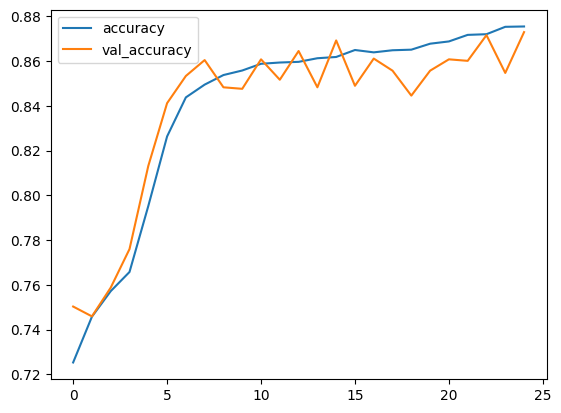

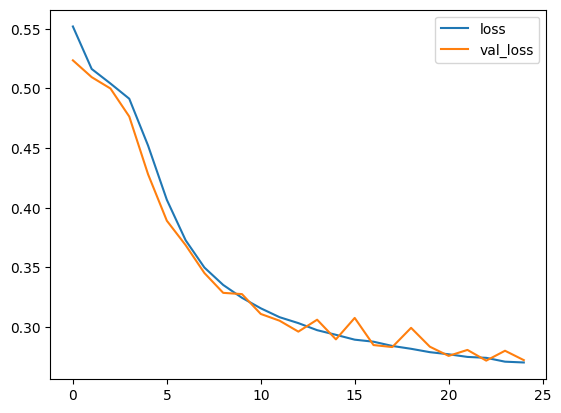

In [ ]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [ ]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_fit)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

232/232 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3362
           1       0.88      0.90      0.89      4037

    accuracy                           0.88      7399
   macro avg       0.88      0.88      0.88      7399
weighted avg       0.88      0.88      0.88      7399



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_func))

Confusion Matrix:
[[2892  470]
 [ 421 3616]]


In [ ]:
train_score = model_functional.evaluate(train_tf)
print("Train Score - Loss: {:.4f}, Accuracy: {:.4f}".format(train_score[0], train_score[1]))

val_score = model_functional.evaluate(val_tf)
print("val Score - Loss: {:.4f}, Accuracy: {:.4f}".format(val_score[0], val_score[1]))

test_score = model_functional.evaluate(test_tf)
print("Test Score - Loss: {:.4f}, Accuracy: {:.4f}".format(test_score[0], test_score[1]))


  1/833 [..............................] - ETA: 30s - loss: 0.2476 - accuracy: 0.8438

833/833 [==============================] - 1s 687us/step - loss: 0.2640 - accuracy: 0.8869
Train Score - Loss: 0.2640, Accuracy: 0.8869
185/185 [==============================] - 0s 656us/step - loss: 0.2723 - accuracy: 0.8730
val Score - Loss: 0.2723, Accuracy: 0.8730
463/463 [==============================] - 0s 669us/step - loss: 0.2651 - accuracy: 0.8796
Test Score - Loss: 0.2651, Accuracy: 0.8796


## Model Improvement

menambahkan batch normalization dan dropout

In [ ]:
# Clear Session
tf.keras.backend.clear_session()
seed = 20

In [ ]:
# Create Functional Model

input_layer = Input(shape=(12))

hidden_layer_1 = Dense(24, activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)

batch_norm_1 = BatchNormalization()(hidden_layer_1)
dropout_1 = Dropout(0.2)(batch_norm_1)

hidden_layer_2 = Dense(24, activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(dropout_1)

batch_norm_2 = BatchNormalization()(hidden_layer_2)
dropout_2 = Dropout(0.2)(batch_norm_2)

concat_layer = concatenate([input_layer, dropout_2])
output_layer = Dense(1, activation='sigmoid',
                     kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_func_up = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func_up.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_func_up.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 12)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 24)                   312       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 24)                   96        ['dense[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 24)                   0         ['batch_normalization[0][0

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_func_up, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Model ANN Functional API yang telah diimprove dengan 2 hidden layers dan 1 output layer.

* Input Layer:

  Jumlah neuron: 12 (sesuai dengan jumlah fitur pada input data).

  Activation function: Tidak didefinisikan karena untuk input data

* Hidden Layer 1:

  Jumlah neuron: 24.

  Activation function: ReLU (Rectified Linear Unit). ReLU merupakan fungsi aktivasi non-linear yang menggantikan semua nilai negatif dengan nol dan melewatkan nilai positif tanpa perubahan.

  BatchNormalization: Dilakukan setelah aktivasi dan digunakan untuk mengnormalisasi input dari setiap batch pada setiap layer sehingga meningkatkan stabilitas dan kecepatan konvergensi pelatihan model

  Dropout Layer:
  Dropout merupakan teknik regularization yang secara acak mengaktifkan atau menonaktifkan neuron pada layer sebelumnya selama pelatihan untuk mengurangi overfitting pada model. Dropout rate sebesar 0.2

* Hidden Layer 2:

  Jumlah neuron: 24.

  Activation function: ReLU. lalu batch normalization dan dropout

* Concatenate Layer:

  Menggabungkan output dari input layer dan dropout_2 yang berfungsi sebagai fitur yang ditambahkan ke input_layer.

* Output Layer:

  Jumlah neuron: 1 (karena output untuk klasifikasi biner).
  
  Activation function: Sigmoid. Fungsi sigmoid digunakan pada output layer untuk menghasilkan probabilitas prediksi dalam rentang [0, 1], yang dapat digunakan untuk mengklasifikasikan data ke dalam 2 kelas.

* Optimizer:

  Optimizer 'adam' untuk mengoptimasi fungsi loss binary crossentropy untuk tugas klasifikasi biner. Metrik evaluasi yang digunakan adalah akurasi yang mengukur seberapa akurat model dalam melakukan prediksi benar terhadap total data yang ada.

In [ ]:
# Train the Model

history_func_up = model_func_up.fit(train_tf,
                                   epochs=25,
                                   validation_data=(val_tf))

Epoch 1/25


833/833 [==============================] - 2s 1ms/step - loss: 0.6015 - accuracy: 0.6945 - val_loss: 0.5153 - val_accuracy: 0.7662
Epoch 2/25
833/833 [==============================] - 1s 1ms/step - loss: 0.5429 - accuracy: 0.7359 - val_loss: 0.5029 - val_accuracy: 0.7747
Epoch 3/25
833/833 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7474 - val_loss: 0.4916 - val_accuracy: 0.7740
Epoch 4/25
833/833 [==============================] - 1s 1ms/step - loss: 0.5116 - accuracy: 0.7552 - val_loss: 0.4713 - val_accuracy: 0.7824
Epoch 5/25
833/833 [==============================] - 1s 1ms/step - loss: 0.4872 - accuracy: 0.7704 - val_loss: 0.4290 - val_accuracy: 0.8017
Epoch 6/25
833/833 [==============================] - 1s 1ms/step - loss: 0.4475 - accuracy: 0.7941 - val_loss: 0.3609 - val_accuracy: 0.8453
Epoch 7/25
833/833 [==============================] - 1s 1ms/step - loss: 0.4024 - accuracy: 0.8157 - val_loss: 0.3196 - val_accuracy: 0.8608
Epoch 8/25
833/83

In [ ]:
# Create DataFrame

history_func_up_df = pd.DataFrame(history_func_up.history)
history_func_up_df

,loss,accuracy,val_loss,val_accuracy
0,0.601488,0.694477,0.515339,0.766216
1,0.542870,0.735854,0.502908,0.774662
2,0.526503,0.747381,0.491586,0.773986
3,0.511607,0.755191,0.471341,0.782432
4,0.487177,0.770360,0.428992,0.801689
5,0.447481,0.794090,0.360872,0.845270
6,0.402351,0.815680,0.319644,0.860811
7,0.377902,0.827958,0.303238,0.859459
8,0.364752,0.834491,0.297299,0.860811
9,0.358709,0.837157,0.294300,0.856419


<Axes: >

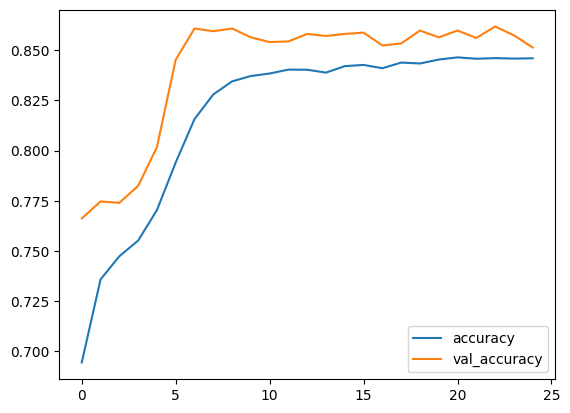

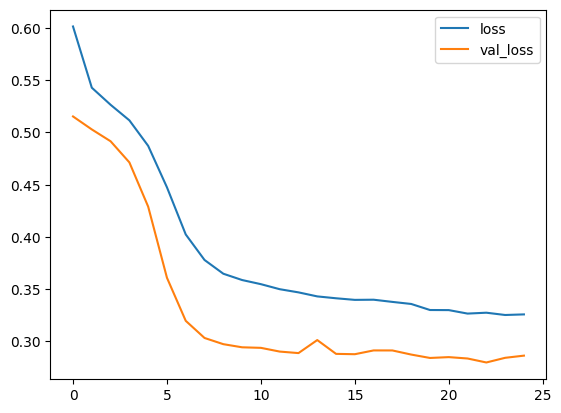

In [ ]:
# Plot Training Results

history_func_up_df[['accuracy', 'val_accuracy']].plot()
history_func_up_df[['loss', 'val_loss']].plot()

In [ ]:
# Evaluate Test-Set

y_pred_func = model_func_up.predict(X_test_fit)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

232/232 [==============================] - 0s 621us/step
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3362
           1       0.91      0.82      0.86      4037

    accuracy                           0.86      7399
   macro avg       0.86      0.86      0.85      7399
weighted avg       0.86      0.86      0.86      7399



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_func))

Confusion Matrix:
[[3020  342]
 [ 730 3307]]


In [ ]:
train_score = model_func_up.evaluate(train_tf)
print("Train Score - Loss: {:.4f}, Accuracy: {:.4f}".format(train_score[0], train_score[1]))

val_score = model_func_up.evaluate(val_tf)
print("val Score - Loss: {:.4f}, Accuracy: {:.4f}".format(val_score[0], val_score[1]))

test_score = model_func_up.evaluate(test_tf)
print("Test Score - Loss: {:.4f}, Accuracy: {:.4f}".format(test_score[0], test_score[1]))


  1/833 [..............................] - ETA: 31s - loss: 0.2590 - accuracy: 0.9375

833/833 [==============================] - 1s 739us/step - loss: 0.2870 - accuracy: 0.8600
Train Score - Loss: 0.2870, Accuracy: 0.8600
185/185 [==============================] - 0s 717us/step - loss: 0.2863 - accuracy: 0.8514
val Score - Loss: 0.2863, Accuracy: 0.8514
463/463 [==============================] - 0s 720us/step - loss: 0.2851 - accuracy: 0.8551
Test Score - Loss: 0.2851, Accuracy: 0.8551


* True Positive (TP): Jumlah data yang diprediksi positif (churn) dengan benar oleh model sebesar 3135.

* False Positive (FP): Jumlah data yang diprediksi positif (churn) oleh model, tetapi sebenarnya data tersebut negatif (non-churn) sebesar 227.

* True Negative (TN): Jumlah data yang diprediksi negatif (non-churn) dengan benar oleh model sebesar 3631.

* False Negative (FN): Jumlah data yang diprediksi negatif (non-churn) oleh model, tetapi sebenarnya data tersebut positif (churn) sebesar 406.

## Random Search

coba coba aja

In [ ]:
'''
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# Definisi seed (jika diperlukan)
seed = 42

def create_model(learning_rate=0.001, dropout_rate=0.2, neurons=24):
    input_layer = Input(shape=(12))
    hidden_layer_1 = Dense(neurons, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
    batch_norm_1 = BatchNormalization()(hidden_layer_1)
    dropout_1 = Dropout(dropout_rate)(batch_norm_1)
    hidden_layer_2 = Dense(neurons/2, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(dropout_1)
    batch_norm_2 = BatchNormalization()(hidden_layer_2)
    dropout_2 = Dropout(dropout_rate)(batch_norm_2)
    concat_layer = concatenate([input_layer, dropout_2])
    output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

    model_functional = Model(inputs=input_layer, outputs=output_layer)

    optimizer = Adam(learning_rate=learning_rate)
    model_functional.compile(loss='binary_crossentropy',
                             optimizer=optimizer,
                             metrics=['accuracy'])
    return model_functional

# Buat objek KerasClassifier dari model Keras
model_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Definisikan hyperparameter space
hyperparameters = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.1, 0.2, 0.3],
    'neurons': [12, 24, 36]  # Jumlah neuron yang ingin diuji
}

# Buat objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_classifier,
                                   param_distributions=hyperparameters,
                                   n_iter=10,  # Jumlah iterasi pencarian
                                   cv=StratifiedKFold(n_splits=3),  # Metode cross-validation
                                   verbose=2,
                                   random_state=seed,
                                   n_jobs=-1)

# Lakukan pencarian dengan data X_train_fit dan y_train
random_search_results = random_search.fit(X_train_fit, y_train)

# Print hasil terbaik
print("Best: %f using %s" % (random_search_results.best_score_, random_search_results.best_params_))
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom tensorflow.keras.wrappers.scikit_learn import KerasClassifier\nfrom tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, concatenate\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.optimizers import Adam\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.model_selection import cross_val_score\nimport numpy as np\n\n# Definisi seed (jika diperlukan)\nseed = 42\n\ndef create_model(learning_rate=0.001, dropout_rate=0.2, neurons=24):\n    input_layer = Input(shape=(12))\n    hidden_layer_1 = Dense(neurons, activation=\'relu\', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)\n    batch_norm_1 = BatchNormalization()(hidden_layer_1)\n    dropout_1 = Dropout(dropout_rate)(batch_norm_1)\n    hidden_layer_2 = Dense(neurons/2, activation=\'relu\', kernel_initializer=tf.keras.initializers.HeNormal(seed))(dropout_1)\n    batch_norm_2 = BatchNormalization()(hid

In [ ]:
'''
# Mendapatkan model terbaik dari hasil pencarian acak
best_model = random_search_results.best_estimator_.model

# Evaluasi model terbaik pada data train
random_train_score = best_model.evaluate(X_train_fit, y_train)
print("Train Score - Loss: {:.4f}, Accuracy: {:.4f}".format(random_train_score[0], random_train_score[1]))

# Evaluasi model terbaik pada data test
random_test_score = best_model.evaluate(X_test_fit, y_test)
print("Test Score - Loss: {:.4f}, Accuracy: {:.4f}".format(random_test_score[0], random_test_score[1]))
'''

'\n# Mendapatkan model terbaik dari hasil pencarian acak\nbest_model = random_search_results.best_estimator_.model\n\n# Evaluasi model terbaik pada data train\nrandom_train_score = best_model.evaluate(X_train_fit, y_train)\nprint("Train Score - Loss: {:.4f}, Accuracy: {:.4f}".format(random_train_score[0], random_train_score[1]))\n\n# Evaluasi model terbaik pada data test\nrandom_test_score = best_model.evaluate(X_test_fit, y_test)\nprint("Test Score - Loss: {:.4f}, Accuracy: {:.4f}".format(random_test_score[0], random_test_score[1]))\n'

# Model Saving

In [ ]:
with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [ ]:
# Freeze Model

model_func_up.trainable = False
model_func_up.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 12)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 24)                   312       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 24)                   96        ['dense[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 24)                   0         ['batch_normalization[0][0

In [ ]:
# Save ANN Model

model_func_up.save('churn_model.h5')

c:\Users\user\anaconda3\envs\tensorCUDA\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Conclusion

saya ingin melihat faktor apa yang mempengaruhi churn berdasarkan:
 * Fitur / Data apa saja yang berpengaruh pada hasil churn?

 fitur yang digunakan ada dalam list feature_cols, yaitu:
 ['avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'used_special_discount',
 'offer_application_preference',
 'feedback']

* Model seperti apa yang digunakan?
  
  Model ANN Functional API yang telah diimprove dengan 2 hidden layers dan 1 output layer.

  * Input Layer:

    Jumlah neuron: 12 (sesuai dengan jumlah fitur pada input data).

    Activation function: Tidak didefinisikan karena untuk input data

  * Hidden Layer 1:

    Jumlah neuron: 24.

    Activation function: ReLU (Rectified Linear Unit). ReLU merupakan fungsi aktivasi non-linear yang menggantikan semua nilai negatif dengan nol dan melewatkan nilai positif tanpa perubahan.

    BatchNormalization: Dilakukan setelah aktivasi dan digunakan untuk mengnormalisasi input dari setiap batch pada setiap layer sehingga meningkatkan stabilitas dan kecepatan konvergensi pelatihan model

    Dropout Layer:
    Dropout merupakan teknik regularization yang secara acak mengaktifkan atau menonaktifkan neuron pada layer sebelumnya selama pelatihan untuk mengurangi overfitting pada model. Dropout rate sebesar 0.2

  * Hidden Layer 2:

    Jumlah neuron: 24.

    Activation function: ReLU. lalu batch normalization dan dropout

  * Concatenate Layer:

    Menggabungkan output dari input layer dan dropout_2 yang berfungsi sebagai fitur yang ditambahkan ke input_layer.

  * Output Layer:

    Jumlah neuron: 1 (karena output untuk klasifikasi biner).
    
    Activation function: Sigmoid. Fungsi sigmoid digunakan pada output layer untuk menghasilkan probabilitas prediksi dalam rentang [0, 1], yang dapat digunakan untuk mengklasifikasikan data ke dalam 2 kelas.

  * Optimizer:

    Optimizer 'adam' untuk mengoptimasi fungsi loss binary crossentropy untuk tugas klasifikasi biner. Metrik evaluasi yang digunakan adalah akurasi yang mengukur seberapa akurat model dalam melakukan prediksi benar terhadap total data yang ada.

 * bagaimana perkembangan ANN?
   * baseline model sequential API:
    - Train Score - Loss: 0.2618, Accuracy: 0.8747
    - val Score - Loss: 0.2677, Accuracy: 0.8703
     - Test Score - Loss: 0.2692, Accuracy: 0.8673
  * improved model sequential API:
    - Train Score - Loss: 0.2281, Accuracy: 0.9129
    - val Score - Loss: 0.2284, Accuracy: 0.9057
    - Test Score - Loss: 0.2244, Accuracy: 0.9157

    accuracy mengalami kenaikan yang cukup signifikan dan loss mengalami penurunan yang cukup signifikan. keduanya sebesar +-4%
  * baseline model functional API:
    - Train Score - Loss: 0.2659, Accuracy: 0.8674
    - val Score - Loss: 0.2748, Accuracy: 0.8618
    - Test Score - Loss: 0.2721, Accuracy: 0.8585
  * improved model functional API:
    - Train Score - Loss: 0.2359, Accuracy: 0.9111
    - val Score - Loss: 0.2347, Accuracy: 0.9061
    - Test Score - Loss: 0.2313, Accuracy: 0.9144
    
    accuracy mengalami kenaikan yang cukup signifikan dan loss mengalami penurunan yang cukup signifikan. keduanya sebesar +-4%, walau tidak ada perbedaan yang signifikan antara sequential dan functional


 * Apakah hasil goodfit?

 dari improved model functional data terlihat good fit karena tidak ada selisih yang signifikan antara train dan test score dan kedua hasil test diatas 91% yang sangat tinggi

Contoh kriteria analisa yang baik diantaranya adalah:

1. Terdapat penjelasan macam-macam hasil metric evaluasi dan interpretasinya terhadap kasus yang diselesaikan.

Metric evaluasi yang digunakan dalam ANN adalah accuracy untuk mengecek perbedaan antara model dan data. untuk functional API digunakan confusion matrix untuk melihat benar tidaknya prediksi data
2. Dapat menjelaskan kelemahan/kekurangan dan kelebihan dari model yang dibuat.

kekurangan model yang dibuat adalah lamanya proses training, data yang memakan memori cukup besar, tidak semua fitur dipakai (bisa jadi dengan semua fitur digunakan membuat hasil lebih akurat)
3. Dapat memberikan statement untuk improvement selanjutnya dari model yang dibuat.

mempercepat proses training dengan improve model, menambah kapasitas memori, coba menggunakan semua fitur.
4. Sebutkan insight yang dapat diambil setelah proses EDA, dll.

Pelanggan yang paling berisiko churn adalah yang memiliki membership level "Basic" atau "No Membership", yang mungkin menunjukkan kurangnya loyalitas atau kepuasan dengan layanan yang diberikan. Selain itu, pelanggan ini bergabung melalui referensi, yang mungkin mengindikasikan bahwa mereka dapat terpengaruh oleh pengalaman orang lain dalam menggunakan layanan.

Dalam upaya untuk mempertahankan pelanggan, perusahaan menggunakan special discount dan pelanggan ini menunjukkan kecenderungan untuk menggunakan preferensi penawaran khusus tersebut. Namun, meskipun ada preferensi dalam menerima penawaran, pelanggan ini memberikan feedback negatif terkait customer service, kualitas produk, dan website perusahaan, serta merasa terganggu dengan banyaknya iklan yang diterima.